In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import seaborn as sns
from datetime import datetime, date, timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
df= pd.read_excel(r'C:\Users\basia\OneDrive\Pulpit\sdu shit\thesis\READY DATASETS\median.xlsx')
df.head()


,datetime,Origin,Day,Month,Week,Weekday,Hour,Minute,Price,Output
0,2022-01-01 15:00:00,1,1,1,1,1,15,0,349.0,55
1,2022-01-01 16:15:00,0,1,1,1,1,16,15,349.0,25
2,2022-01-02 07:00:00,1,2,1,1,2,7,0,399.0,44
3,2022-01-02 08:15:00,0,2,1,1,2,8,15,399.0,13
4,2022-01-02 15:15:00,1,2,1,52,6,15,15,399.0,25


In [4]:
df.shape

(4099, 10)

In [6]:
df['Origin'] = df['Origin'].astype(float)
df['Week'] = df['Week'].astype(float)
df['datetime'] = pd.to_datetime(df['datetime'])
print(df.dtypes)
train_data = df[df['datetime'] < '2022-10-01']
test_data = df[df['datetime'] >= '2022-10-01']



datetime    datetime64[ns]
Origin             float64
Day                  int64
Month                int64
Week               float64
Weekday              int64
Hour                 int64
Minute               int64
Price              float64
Output               int64
dtype: object


In [7]:
import statsmodels.api as sm
arimax_model = sm.tsa.ARIMA(train_data['Output'], order=(2, 1, 0), exog=train_data[['Origin', 'Weekday', 'Week',  'Month', 'Hour', 'Minute', 'Price']])
arimax_results = arimax_model.fit()
test_data['predicted_demand'] = arimax_results.predict(start=test_data.index.min(), end=test_data.index.max(), exog=test_data[['Origin', 'Weekday', 'Week','Month','Hour', 'Minute', 'Price']])


C:\Users\basia\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\basia\AppData\Local\Temp\ipykernel_8012\235258785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_demand'] = arimax_results.predict(start=test_data.index.min(), end=test_data.index.max(), exog=test_data[['Origin', 'Weekday', 'Week','Month','Hour', 'Minute', 'Price']])


In [9]:
from sklearn.metrics import mean_squared_error

# calculate the mean squared error (MSE) of the predicted demand and actual demand
mse = mean_squared_error(test_data['Output'], test_data['predicted_demand'])

print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 91.34


In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_data['Output'], test_data['predicted_demand']) #

7.431902735209383

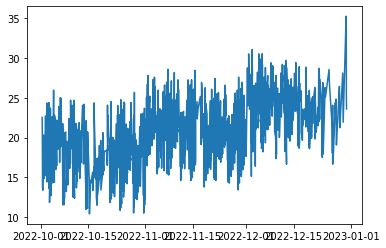

In [10]:
plt.plot(test_data['datetime'],test_data['predicted_demand'])


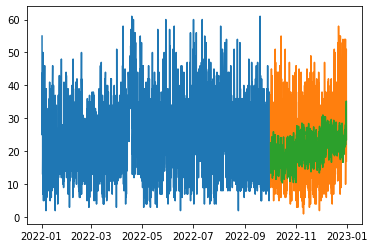

In [12]:
plt.plot(train_data['datetime'], train_data['Output'], label='Train Data')
plt.plot(test_data['datetime'], test_data['Output'], label='Test Data')
plt.plot(test_data['datetime'], test_data['predicted_demand'], label='Predicted Data')
